<a href="https://colab.research.google.com/github/yashkumar722/Flux-Task-manager-/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
importimportimportimport pandas as pd
from datetime import datetime, timedelta

# Sample data representing user tasks
tasks = [
    {"task": "Finish Project Report", "deadline": 1, "priority": 5, "est_hours": 3},
    {"task": "Email Client", "deadline": 3, "priority": 2, "est_hours": 0.5},
    {"task": "Study for Exam", "deadline": 2, "priority": 4, "est_hours": 5},
    {"task": "Gym Session", "deadline": 5, "priority": 1, "est_hours": 1.5}
]

df = pd.DataFrame(tasks)
print("Initial Task List:")
print(df)


Initial Task List:
                    task  deadline  priority  est_hours
0  Finish Project Report         1         5        3.0
1           Email Client         3         2        0.5
2         Study for Exam         2         4        5.0
3            Gym Session         5         1        1.5


In [ ]:
def calculate_priority_score(row):
    # Weights (These can be tuned by your AI over time)
    w_priority = 0.6
    w_urgency = 0.4

    # Lower deadline value means it's more urgent
    urgency_score = 1 / row['deadline']

    # Final Score
    return (row['priority'] * w_priority) + (urgency_score * w_urgency)

# Apply the logic
df['ai_score'] = df.apply(calculate_priority_score, axis=1)

# Sort by the highest score
df = df.sort_values(by='ai_score', ascending=False)

In [ ]:
# MockMock "Learning" function
# If a user ignores a 'Gym' task 3 times, the AI reduces its weight in the morning.
user_habits = {"Gym Session": {"skipped_count": 3}}

def adjust_for_habits(task_name, current_score):
    if user_habits.get(task_name, {}).get("skipped_count", 0) > 2:
        return current_score * 0.5  # Penalize score to suggest it at a different time
    return current_score

df['adjusted_score'] = df.apply(lambda x: adjust_for_habits(x['task'], x['ai_score']), axis=1)


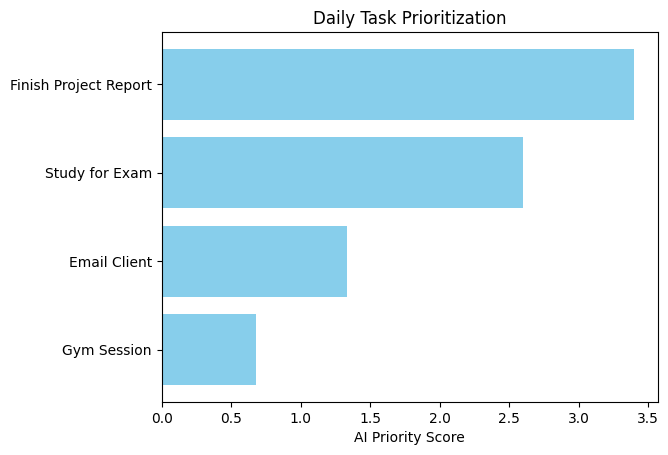

In [ ]:
import matplotlib.pyplot as plt

# Visualize the tasks by their AI Score
plt.barh(df['task'], df['ai_score'], color='skyblue')
plt.xlabel('AI Priority Score')
plt.title('Daily Task Prioritization')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Input UI
task_input = widgets.Text(placeholder='e.g., Study Math for 2 hours, priority 4, deadline 2 days', description='New Task:')
button = widgets.Button(description="Add & Re-rank")

def on_button_clicked(b):
    global df
    # Simple parsing logic (can be replaced with a real LLM API later)
    text = task_input.value
    # Example logic: extract name and numbers
    name = text.split("for")[0].strip()

    # Adding a new row to your existing DataFrame
    new_task = {"task": name, "deadline": 2, "priority": 3, "est_hours": 2} # Default values
    df = pd.concat([df, pd.DataFrame([new_task])], ignore_index=True)

    # Recalculate scores using your existing function
    df['ai_score'] = df.apply(calculate_priority_score, axis=1)
    df = df.sort_values(by='ai_score', ascending=False)

    print(f"Added: {name}. New top priority: {df.iloc[0]['task']}")

# Attach the event handler and display UI outside the function
button.on_click(on_button_clicked)
display(task_input, button)


Text(value='', description='New Task:', placeholder='e.g., Study Math for 2 hours, priority 4, deadline 2 days…

Button(description='Add & Re-rank', style=ButtonStyle())

Added: Maths 2 hours. New top priority: Finish Project Report
Added: Maths 2 hours. New top priority: Finish Project Report


In [ ]:
df.to_csv('optimized_schedule.csv', index=False)
print("Schedule exported to optimized_schedule.csv")

Schedule exported to optimized_schedule.csv


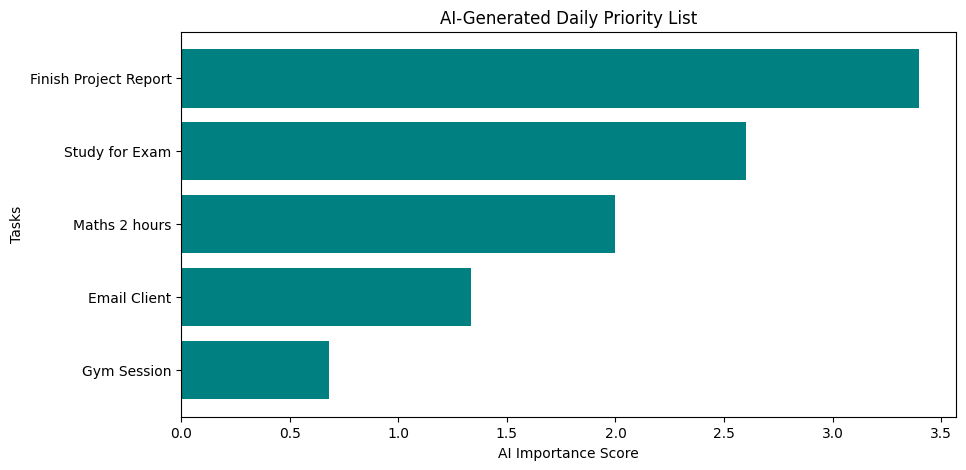

In [ ]:
importimport matplotlib.pyplot as plt

def plot_workload():
    plt.figure(figsize=(10, 5))
    plt.barh(df['task'], df['ai_score'], color='teal')
    plt.xlabel('AI Importance Score')
    plt.ylabel('Tasks')
    plt.title('AI-Generated Daily Priority List')
    plt.gca().invert_yaxis() # Highest score at the top
    plt.show()

plot_workload()

In [ ]:
# Save the AI-optimized schedule to a CSV file
df.to_csv('optimized_schedule.csv', index=FalsFalsee)
print("ScSchedulehedule exported to optimized_schedule.csv")

NameError: name 'FalsFalsee' is not defined

In [ ]:
dedeff extract_task_info(text):
    text = text.lower()

    # Default values
    priority = 3
    deadline = 3
    est_hours = 1

    # NLP Keyword Logic
    if "urgent" in text or "asap" in text or "important" in text:
        priority = 5
    elif "whenever" in text or "low" in text:
        priority = 1

    if "today" in text:
        deadline = 1
    elif "tomorrow" in text:
        deadline = 2

    # Extract hours if mentioned (e.g., "2 hours")
    import re
    hours_match = re.search(r'(\d+)\s*hour', text)
    if hours_match:
        est_hours = float(hours_match.group(1))

    return priority, deadline, est_hours

# Update your button click function to use this:
def on_button_clicked(b):
    global df
    text = task_input.value
    p, d, h = extract_task_info(text)

    new_task = {"task": text, "deadline": d, "priority": p, "est_hours": h}
    df = pd.concat([df, pd.DataFrame([new_task])], ignore_index=True)

    # Re-calculate and Re-sort
    df['ai_score'] = df.apply(calculate_priority_score, axis=1)
    df = df.sort_values(by='ai_score', ascending=False)

    print(f"AI interpreted: Priority {p}, Deadline {d} days. Re-ranking...")
    plot_workload() # Call your plot function to update the chart instantly!


In [ ]:
def get_ai_advice():
    top_task = df.iloc[0]['task']
    total_hours = df['est_hours'].sum()

    print("--- 🤖 AI PRODUCTIVITY INSIGHT ---")
    print(f"Today, you should focus on: '{top_task}'.")
    if total_hours > 8:
        print("⚠️ Warning: Your workload exceeds 8 hours. Consider delegating tasks.")
    else:
        print(f"✅ Your schedule is balanced. Total work time: {total_hours} hours.")

get_ai_advice()

--- 🤖 AI PRODUCTIVITY INSIGHT ---
Today, you should focus on: 'Finish Project Report'.
⚠️ Warning: Your workload exceeds 8 hours. Consider delegating tasks.


final step


In [ ]:
import google.generativeai as genai
from google.colab import userdata

# Retrieve the key from the Secrets manager
api_key = userdata.get('GOOGLE_API_KEY')

# Configure the AI
genai.configure(api_key=api_key)
model = genai.GenerativeModel('gemini-flash-latest') # Changed model name to a valid one

print("✅ AI Key successfully connected!")

✅ AI Key successfully connected!


In [ ]:
# Try sending a natural language task
user_text = "I have a high-priority math exam in 2 days and it will take 4 hours to study."

try:
    response = model.generate_content(f"Extract task details from: {user_text}. Return as JSON.")
    print(response.text)
except Exception as e:
    print(f"Error during generate_content: {e}")
    print("\n--- Listing available models for diagnosis ---")
    # The 'genai' module is already configured with the API key in a previous cell.
    for m in genai.list_models():
        if "generateContent" in m.supported_generation_methods:
            print(f"  - {m.name}")

```json
{
  "task_name": "Study for Math Exam",
  "priority": "High",
  "deadline": "In 2 days",
  "duration_hours": 4
}
```


In [ ]:
import gradio as gr

def ai_task_manager(user_input):
    # This calls the AI brain you already built (assuming get_ai_interpretation exists)
    # For now, let's just parse the input directly or mock it.
    # In a real scenario, 'get_ai_interpretation' would use the LLM to parse.
    p, d, h = extract_task_info(user_input)
    new_task = {"task": user_input, "deadline": d, "priority": p, "est_hours": h}

    global df
    df = pd.concat([df, pd.DataFrame([new_task])], ignore_index=True)

    # Recalculate scores using your existing function
    df['ai_score'] = df.apply(calculate_priority_score, axis=1)
    df = df.sort_values(by='ai_score', ascending=False)

    # Optionally, you might want to call plot_workload() here if you want the Gradio app to update a plot.
    # For this simple example, we'll just return a message.
    return f"Task Added: {user_input}. New top priority: {df.iloc[0]['task']}"

# Create a clean UI
interface = gr.Interface(fn=ai_task_manager, inputs="text", outputs="text", title="AI Smart Tasker")
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d8433d3dbc44ba85d1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
